In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

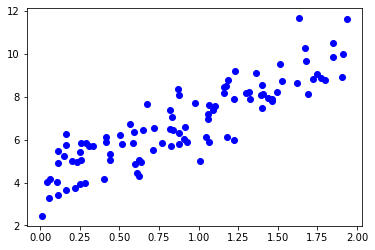

In [6]:
plt.plot(X,y,'bo')

In [7]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.00357833],
       [3.07518655]])

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

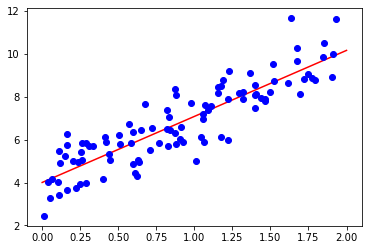

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"bo")
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.00357833]), array([[3.07518655]]))

In [12]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradients

In [13]:
theta

array([[4.00357833],
       [3.07518655]])

In [14]:
# theta_path_bgd = []

def plot_gradient_descent(theta, eta):
  m = len(X_b)
  plt.plot(X, y, "b.")
  n_iterations = 1000 #large no. of iterations
  stepsTaken = n_iterations
  for iteration in range(n_iterations):
    y_predict = X_new_b.dot(theta)
    style = "b-" if iteration > 0 else "r--"
    plt.plot(X_new, y_predict, style)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    if np.linalg.norm(gradients) < 1: #stop iterating when gradient becomes small. need to decide what's considered "small"
      stepsTaken = iteration
      break
    theta = theta - eta*gradients #NOTE this is different from -= eta*gradients due to numpy array (and collections in general) behavior
  plt.xlabel("$x_1$", fontsize=18)
  plt.axis([0,2,0,15])
  plt.title("$\eta={}$ ({} steps)".format(eta, stepsTaken))

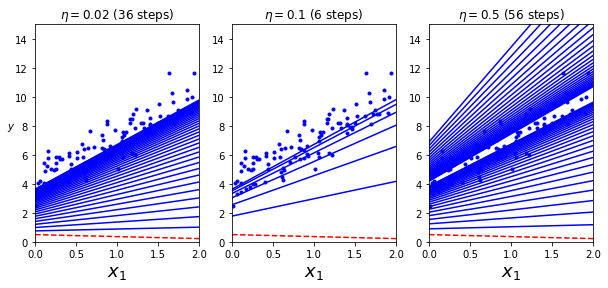

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [16]:
n_epochs = 50
t0, t1, = 5, 50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(n_epochs):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta*gradients

In [17]:
theta

array([[3.98325461],
       [3.1086704 ]])

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.972591]), array([3.07521167]))

In [20]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)

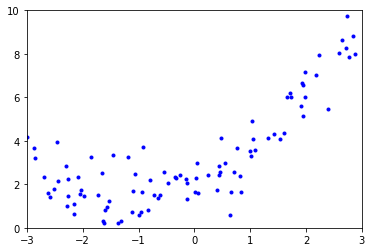

In [21]:
plt.plot(X,y,"b.")
plt.axis([-3, 3, 0, 10])
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

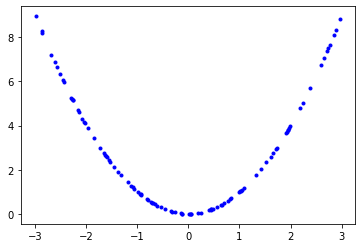

In [23]:
plt.plot(X_poly[:,0], X_poly[:,1],"b.")

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.91166116]), array([[1.08941251, 0.50052437]]))

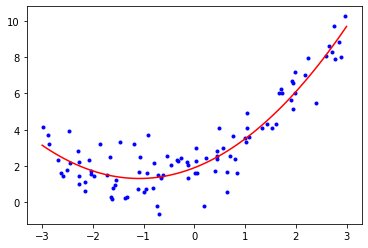

In [25]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r")

In [26]:
#plot learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.legend(loc="best")
  plt.xlabel("train set size")
  plt.ylabel("RMSE")
  plt.axis([0, 80, 0, 3])

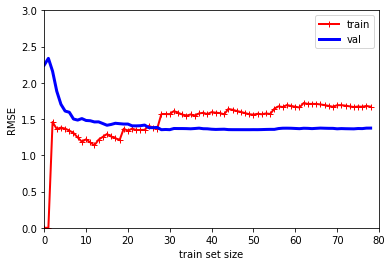

In [27]:
#learning curves for linear regression model
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

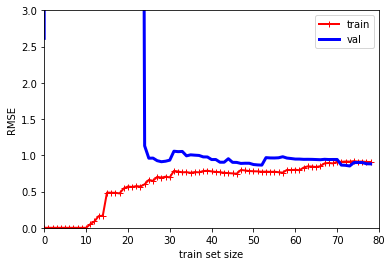

In [28]:
#learning curves for poly. reg. model
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
  ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

In [29]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [30]:
#ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [31]:
#stochastic gradient descent
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

In [32]:
#lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [33]:
#elastic net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [34]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [35]:
#early stop
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

#prepare data
poly_scaler = Pipeline([
  ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
  ("std_scaler", StandardScaler()),
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

In [36]:
#log reg
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

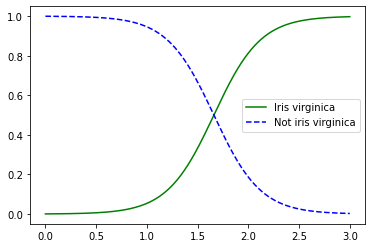

In [42]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not iris virginica")
plt.legend(loc="best")